##### Python Code for Exploratory Data Analysis (EDA) #####

In [1]:
#Load and prepare data
import pandas as pd
data = pd.read_csv("Fraud.csv")

# Display the first few rows of the dataset
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


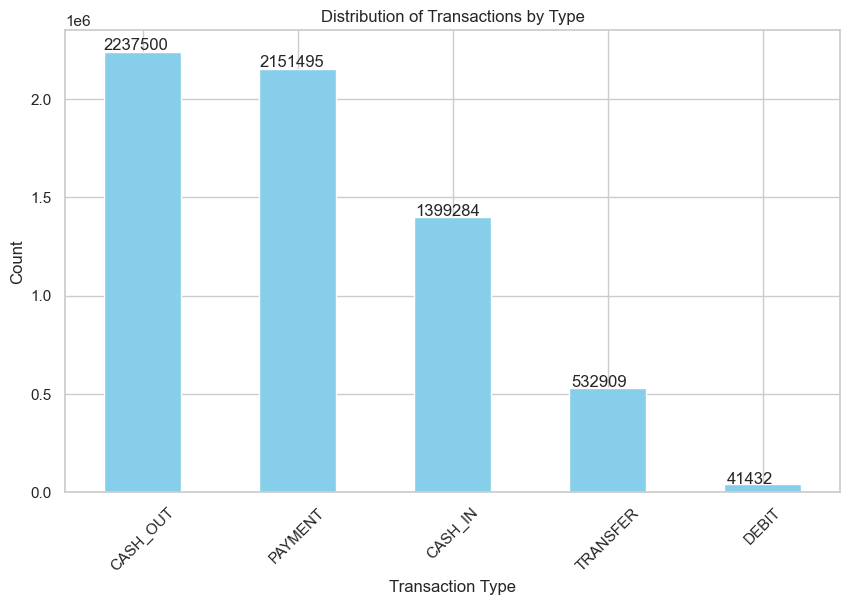

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Count of transactions by type
type_counts = data['type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

# Add counts above the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xticks(rotation=45)
plt.show()


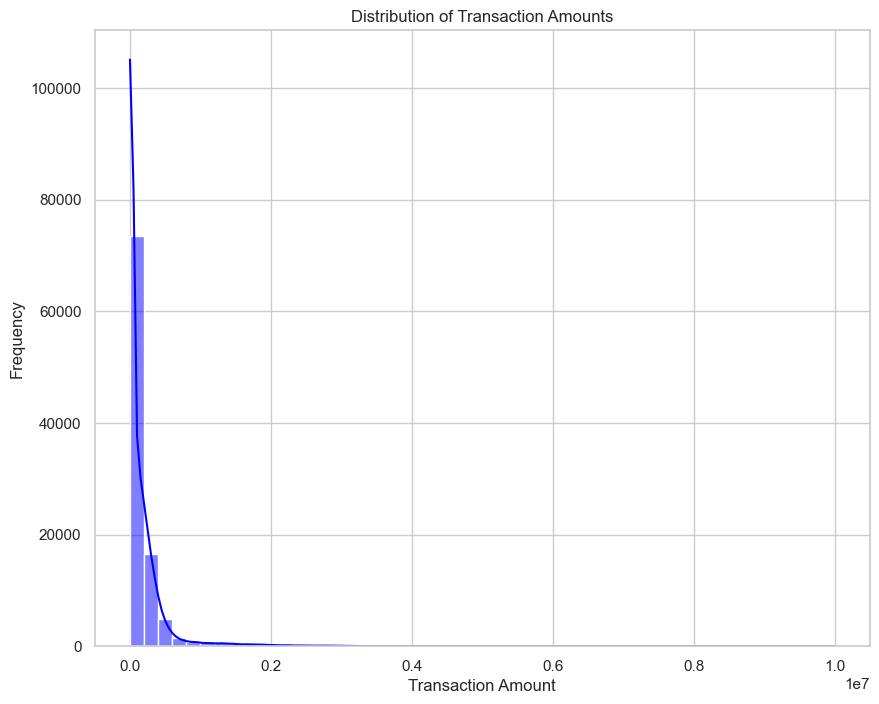

In [20]:
# Histogram of transaction amounts
plt.figure(figsize=(10, 8))
sns.histplot(data['amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\erito\AppData\Local\Temp\ipykernel_5416\1102772625.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


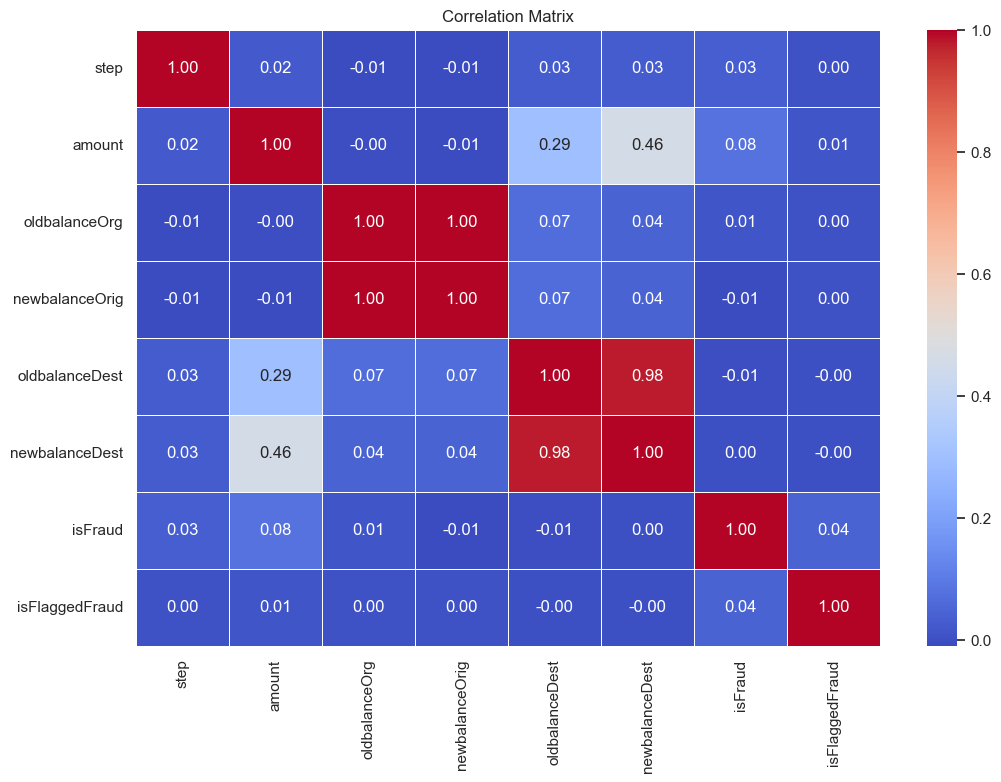

In [4]:
# Correlation analisys between variables - Correlation matrix
corr_matrix = data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


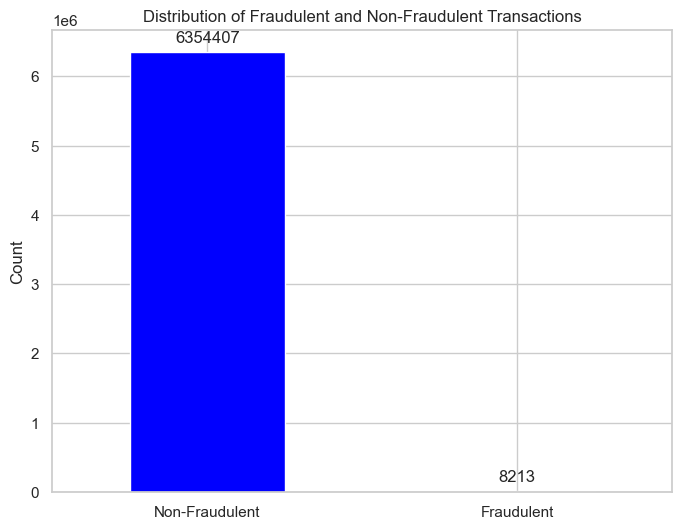

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of fraudulent and non-fraudulent transactions
fraud_counts = data['isFraud'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = fraud_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'], rotation=0)

# Add counts above the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [6]:
# Percentage of fraudlant transacion in this dataset
non_fraudulent = 6354407
fraudulent = 8212

# Total number of transactions
total_transactions = non_fraudulent + fraudulent

# Percentage of fraudulent transactions
percentage_fraudulent = (fraudulent / total_transactions) * 100

# Output the result
percentage_fraudulent


0.12906634830719865

In [7]:
# Display descriptive statistics of the dataset
print(data.describe(include='all'))

                step      type        amount     nameOrig  oldbalanceOrg  \
count   6.362620e+06   6362620  6.362620e+06      6362620   6.362620e+06   
unique           NaN         5           NaN      6353307            NaN   
top              NaN  CASH_OUT           NaN  C1902386530            NaN   
freq             NaN   2237500           NaN            3            NaN   
mean    2.433972e+02       NaN  1.798619e+05          NaN   8.338831e+05   
std     1.423320e+02       NaN  6.038582e+05          NaN   2.888243e+06   
min     1.000000e+00       NaN  0.000000e+00          NaN   0.000000e+00   
25%     1.560000e+02       NaN  1.338957e+04          NaN   0.000000e+00   
50%     2.390000e+02       NaN  7.487194e+04          NaN   1.420800e+04   
75%     3.350000e+02       NaN  2.087215e+05          NaN   1.073152e+05   
max     7.430000e+02       NaN  9.244552e+07          NaN   5.958504e+07   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  \
count     6.3626

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load your dataset
data = pd.read_csv('fraud.csv')

# Handle missing values (if any)
print(data.isnull().sum())

# Applying label encoder to convert string to float
labelencoder1 = LabelEncoder()
data['type'] = labelencoder1.fit_transform(data['type'])

labelencoder3 = LabelEncoder()
data['nameOrig'] = labelencoder3.fit_transform(data['nameOrig'])

labelencoder6 = LabelEncoder()
data['nameDest'] = labelencoder6.fit_transform(data['nameDest'])

# Feature Engineering: Create new features
data['balance_diff'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['dest_balance_diff'] = data['oldbalanceDest'] - data['newbalanceDest']
data['amount_relative_to_balance'] = data['amount'] / (data['oldbalanceOrg'] + 1)

# Feature Selection: Drop highly correlated features
data.drop(columns=['nameOrig', 'nameDest'], inplace=True)

# Prepare the feature matrix and target vector
X = data.drop(columns=['isFraud', 'isFlaggedFraud'])
y = data['isFraud']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shape of the resampled data
print("Original dataset shape:", y.value_counts())
print("Resampled dataset shape:", y_res.value_counts())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Original dataset shape: 0    99884
1      116
Name: isFraud, dtype: int64
Resampled dataset shape: 0    99884
1    99884
Name: isFraud, dtype: int64


#### Applying Models ####

In [18]:
#!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/99.8 MB 8.6 MB/s eta 0:00:12
   ---------------------------------------- 0.7/99.8 MB 9.5 MB/s eta 0:00:11
   ---------------------------------------- 1.2/99.8 MB 9.2 MB/s eta 0:00:11
    --------------------------------------- 1.6/99.8 MB 8.4 MB/s eta 0:00:12
    --------------------------------------- 2.1/99.8 MB 9.0 MB/s eta 0:00:11
    --------------------------------------- 2.5/99.8 MB 9.4 MB/s eta 0:00:11
   - -------------------------------------- 2.7/99.8 MB 8.7 MB/s eta 0:00:12
   - -------------------------------------- 3.1/99.8 MB 8.7 MB/s eta 0:00:12
   - -------------------------------------- 3.6/99.8 MB 8.8 MB/s eta 0:00:11
   - ---------------------------

Training Logistic Regression...
Logistic Regression - Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     29830
           1       0.93      0.92      0.93     30101

    accuracy                           0.93     59931
   macro avg       0.93      0.93      0.93     59931
weighted avg       0.93      0.93      0.93     59931

Logistic Regression - Confusion Matrix:
[[27852  1978]
 [ 2337 27764]]
Logistic Regression - ROC-AUC Score: 0.9762896410556914

Training Random Forest...
Random Forest - Best Hyperparameters: {'max_depth': 20, 'n_estimators': 100}
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29830
           1       1.00      1.00      1.00     30101

    accuracy                           1.00     59931
   macro avg  

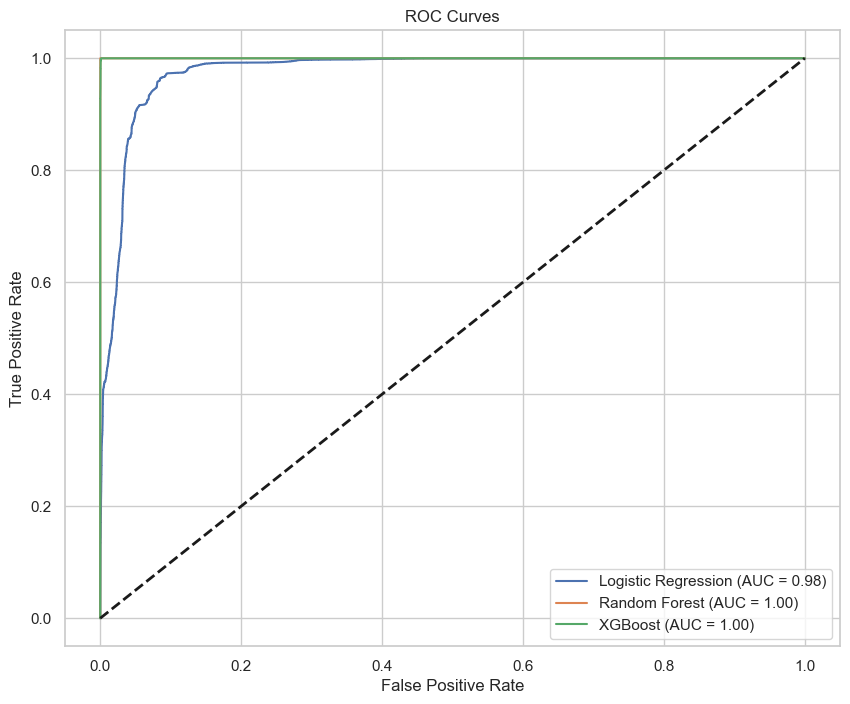

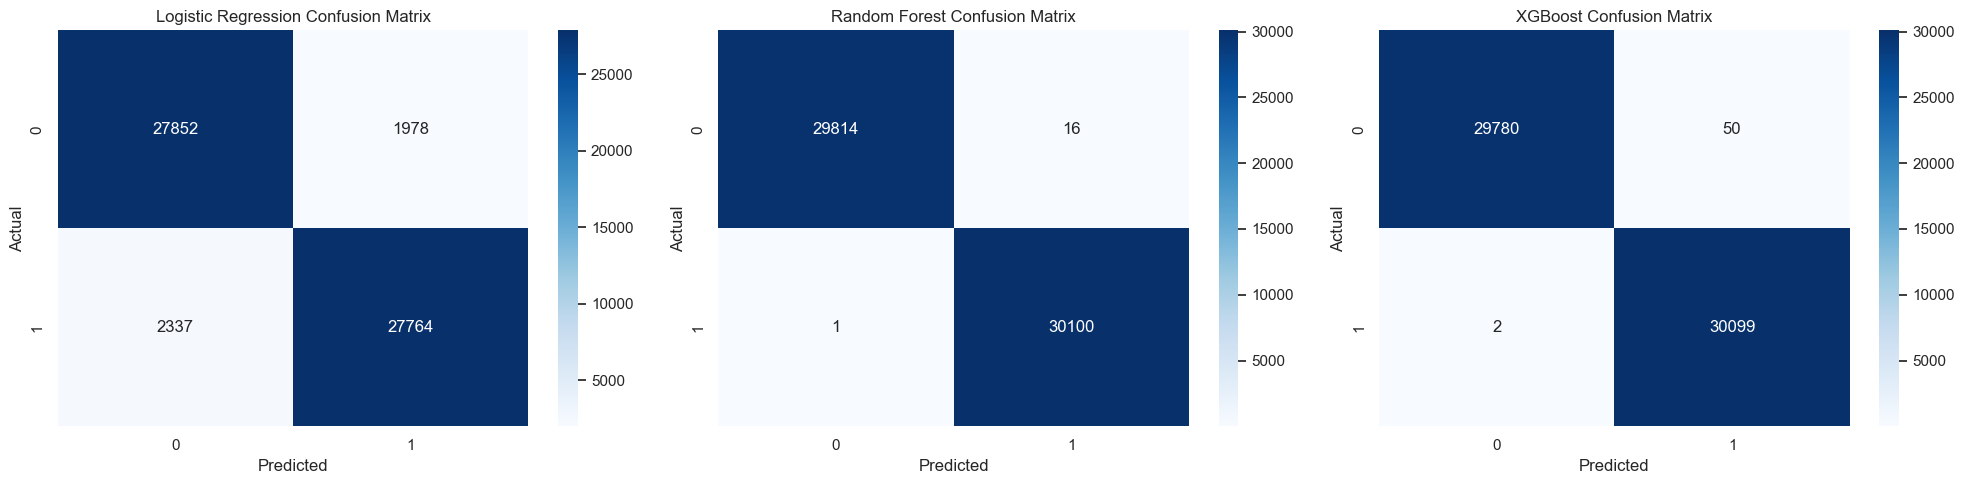

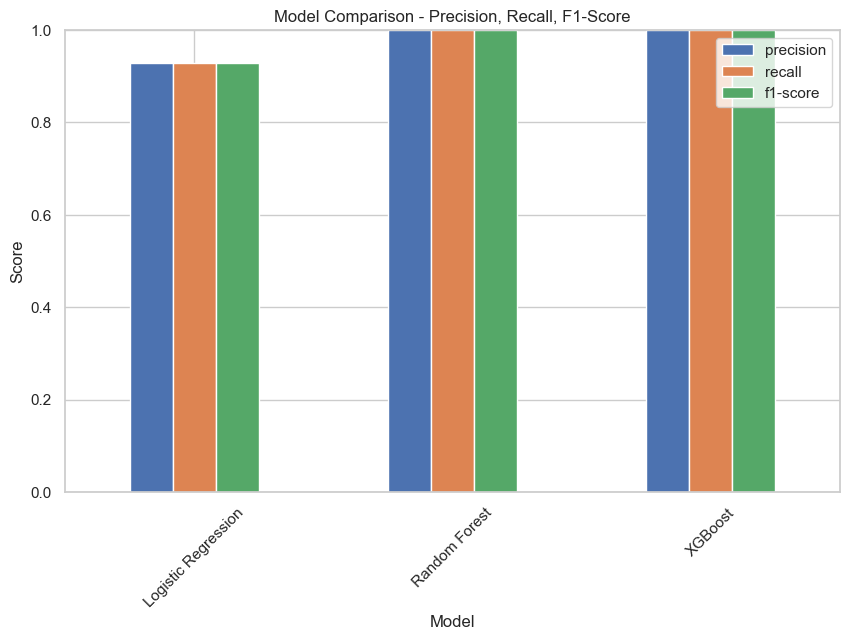

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Fraud.csv')


# Define the models and parameter grids
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [10, 20]
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

best_estimators = {}
results = {}

# Perform GridSearchCV and Cross-Validation
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=2, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    y_pred = best_estimators[model_name].predict(X_test_scaled)
    y_pred_proba = best_estimators[model_name].predict_proba(X_test_scaled)[:, 1]
    
    # Save results
    results[model_name] = {
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'roc_auc_score': roc_auc_score(y_test, y_pred_proba),
        'fpr': roc_curve(y_test, y_pred_proba)[0],
        'tpr': roc_curve(y_test, y_pred_proba)[1],
        'thresholds': roc_curve(y_test, y_pred_proba)[2]
    }
    
    print(f"{model_name} - Best Hyperparameters:", grid_search.best_params_)
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_name} - Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"{model_name} - ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba)}\n")

# Plot ROC Curves
plt.figure(figsize=(10, 8))
for model_name in results.keys():
    plt.plot(results[model_name]['fpr'], results[model_name]['tpr'], label=f'{model_name} (AUC = {results[model_name]["roc_auc_score"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for ax, (model_name, result) in zip(axes, results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

# Plot Classification Report Metrics
metrics_df = pd.DataFrame({model_name: result['classification_report']['weighted avg'] for model_name, result in results.items()})
metrics_df = metrics_df.T[['precision', 'recall', 'f1-score']]

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison - Precision, Recall, F1-Score')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()
